In [4]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def estimate_m_values(data, strain_rate_columns, strain_rates):
    """
    Estimate m values for each strain by fitting a linear regression to log-log data and visualize the results.
    """
    m_values = []
    
    for i in range(len(data)):
        # Extract stress values for different strain rates for the current row
        stress_values = data.iloc[i][strain_rate_columns].values
        
        # Apply log transformation to stress and strain rates
        log_stress = np.log(stress_values)
        log_strain_rates = np.log(strain_rates / 0.0001).reshape(-1, 1)
        
        # Linear regression with intercept set to zero
        model = LinearRegression(fit_intercept=False)
        model.fit(log_strain_rates, log_stress)
        
        # Get the slope (m value)
        slope = model.coef_[0]
                
        # Append the estimated m and corresponding strain
        m_values.append({
            'strain': data['strain'].iloc[i],
            'm_estimated': slope
        })
    
    # Convert m_values to a DataFrame
    df = pd.DataFrame(m_values)
    
    # Plotting real vs predicted stress for each strain rate
    strain = data['strain']
    for strain_rate, col in zip(strain_rates, strain_rate_columns):
        # Calculate predicted stress using evolving m for each strain
        fitted_stress = [(strain_rate / strain_rates[0]) ** m for m in df['m_estimated']]
        real_stress = data[col]
        
        # Plot the predicted and real stress values
        plt.plot(strain, fitted_stress, label=f'Predicted StrRt{strain_rate}')
        plt.scatter(strain, real_stress, color='red', label=f'Real StrRt{strain_rate}')
        plt.xlabel('Strain')
        plt.ylabel('Normalized Stress')
        plt.title(f'Real vs Predicted Stress for StrRt {strain_rate}')
        plt.legend()
        plt.show()
    
    # Save m values to a CSV
    df.to_csv('m_values.csv', index=False)
    return df


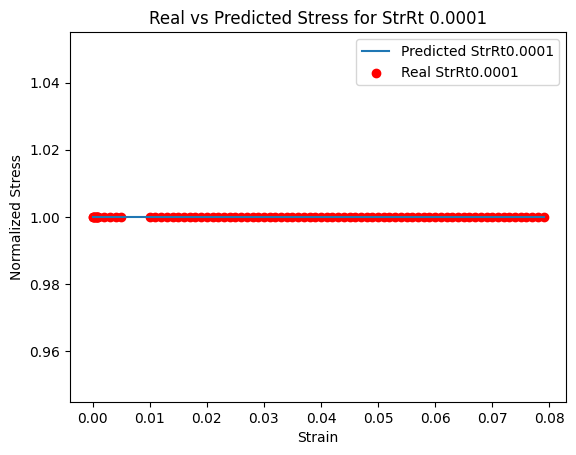

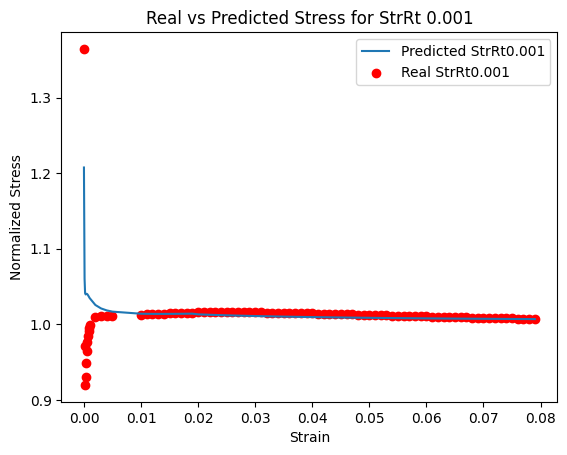

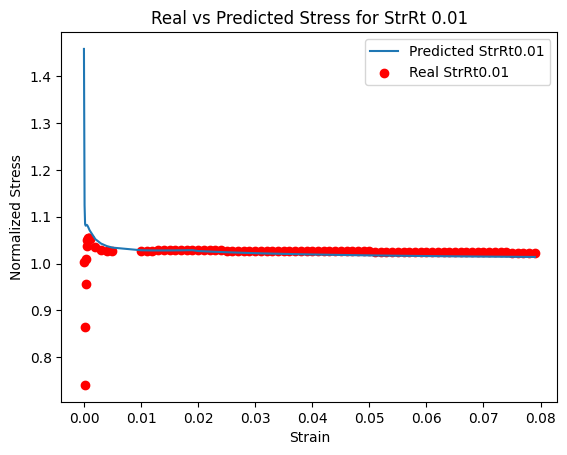

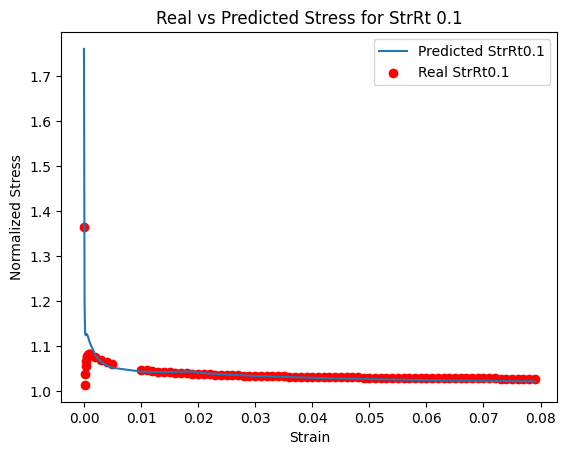

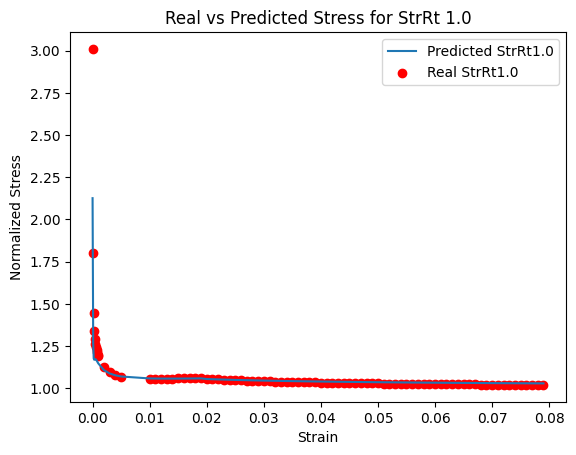

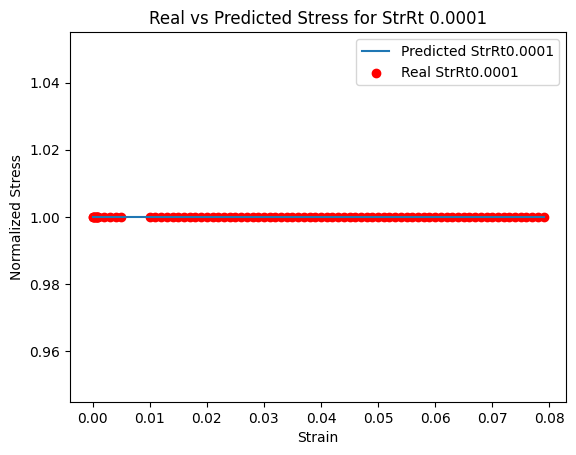

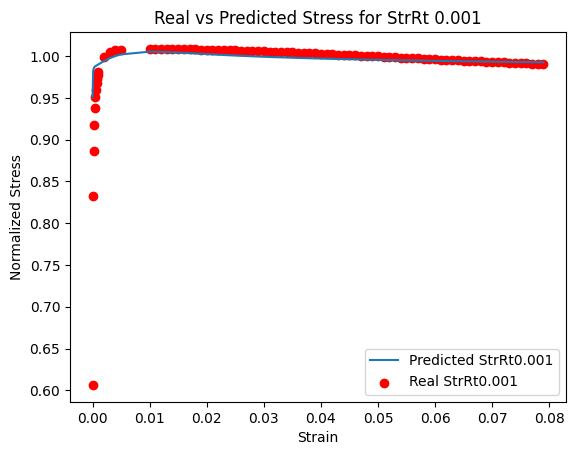

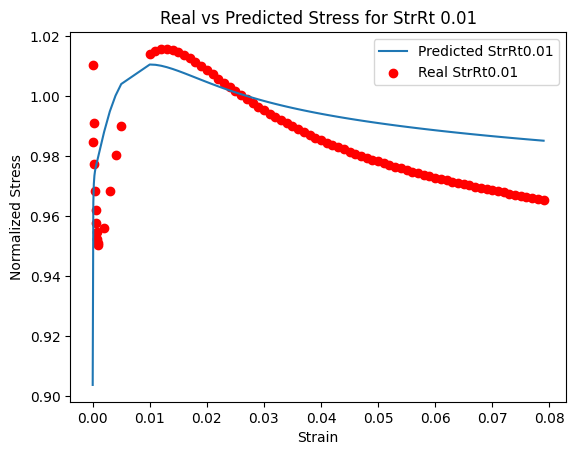

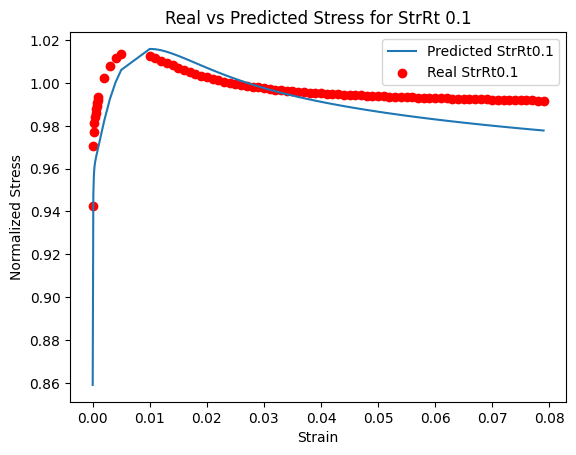

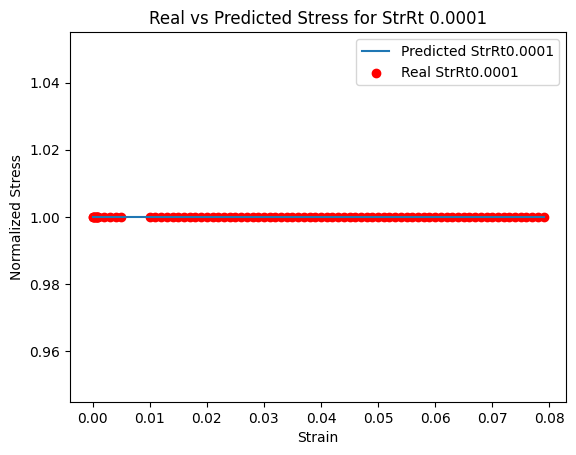

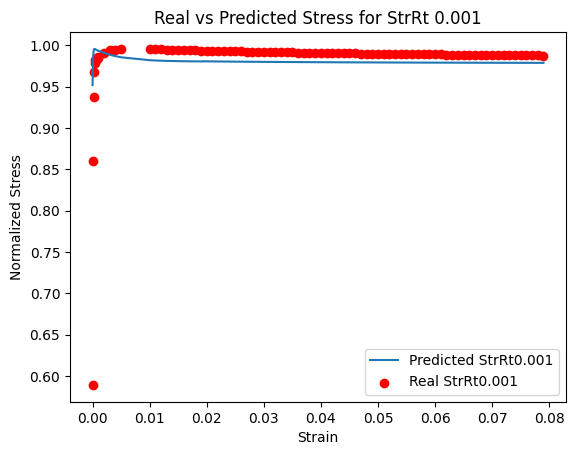

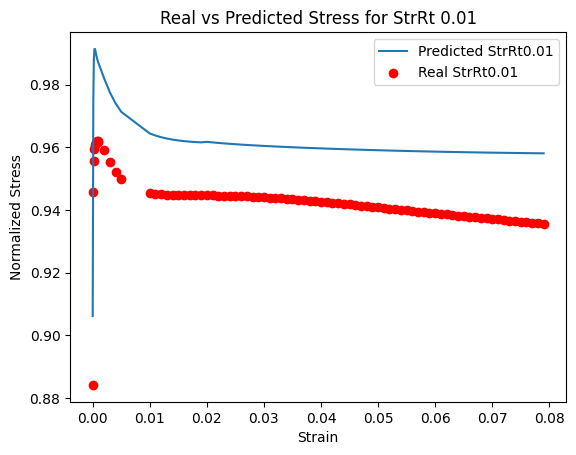

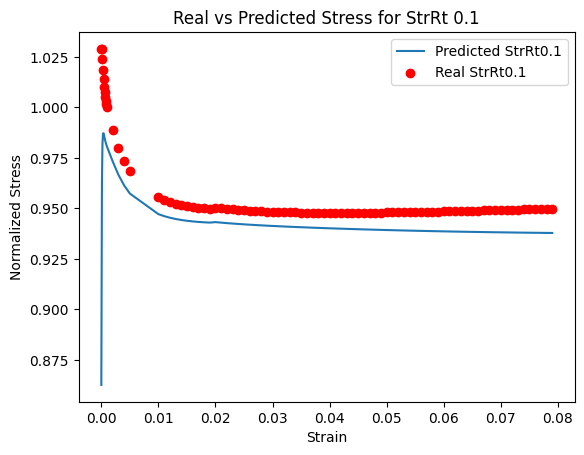

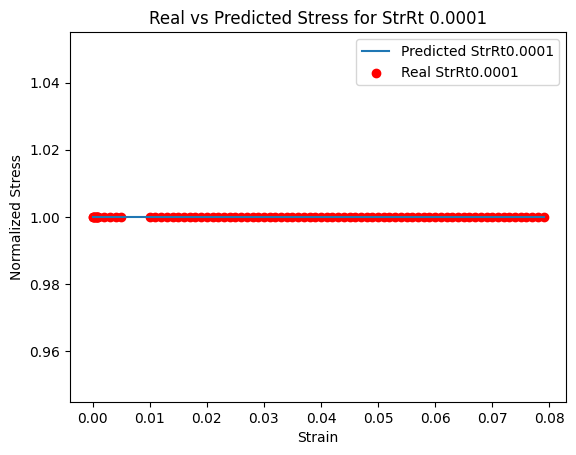

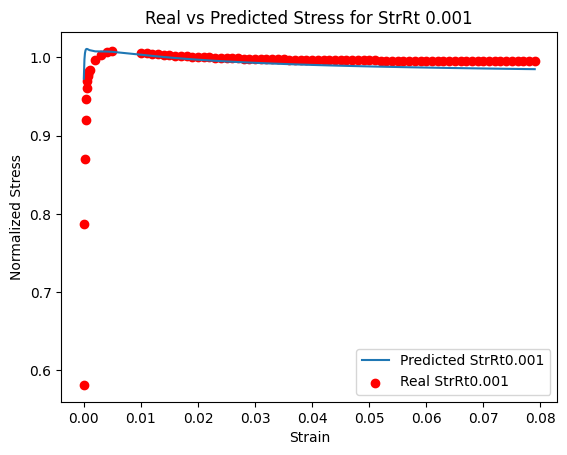

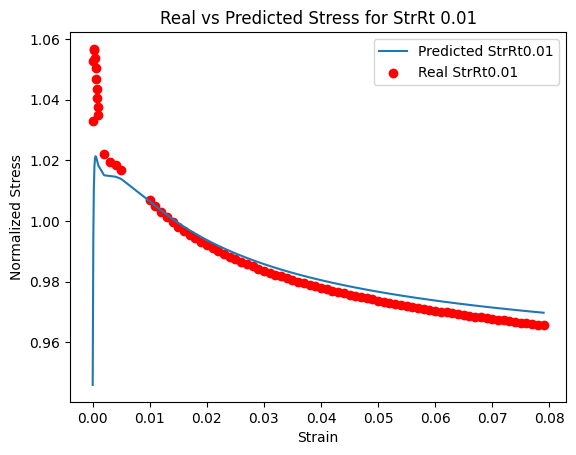

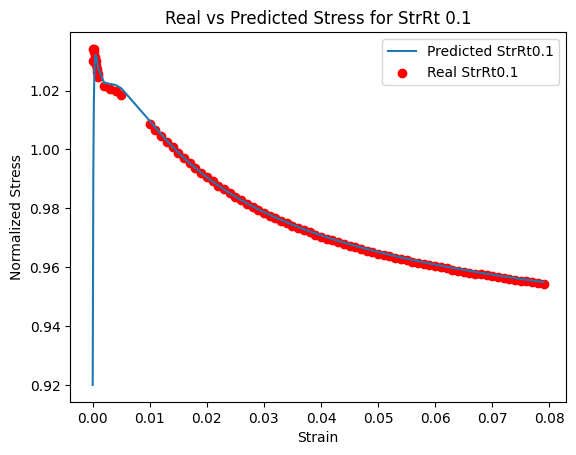

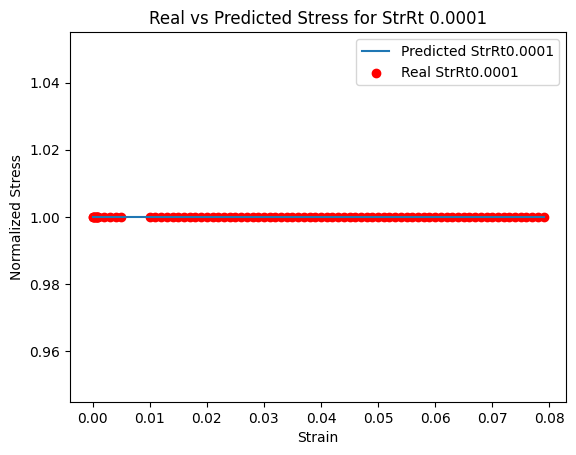

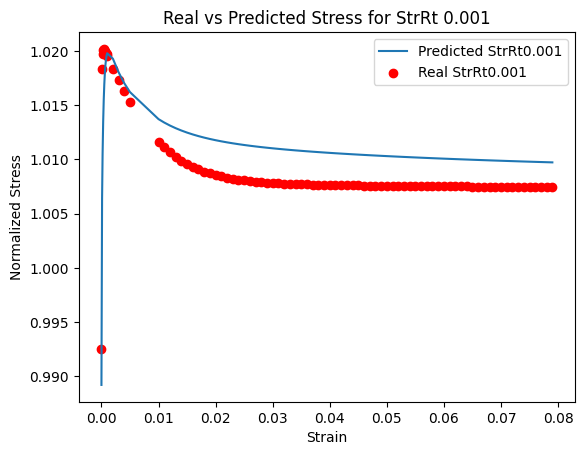

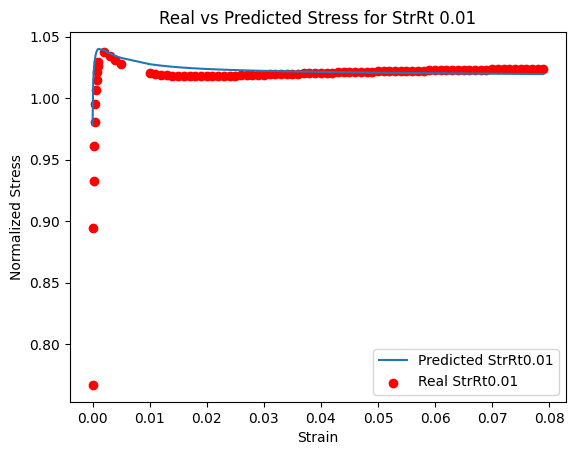

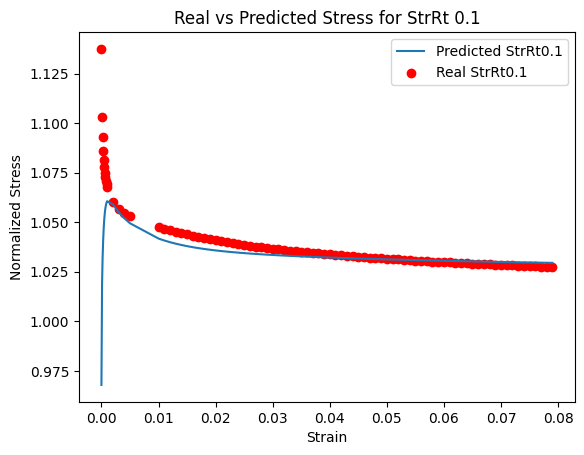

In [22]:
temperature_file = 'Tmp298.15_RD.csv'
strain_rates = np.array([0.0001, 0.001, 0.01, 0.1, 1])
strain_rate_columns = ['ref_StrRt0.0001', 'ref_StrRt0.001', 'ref_StrRt0.01', 'ref_StrRt0.1', 'ref_StrRt1']

data = pd.read_csv(temperature_file)

# Step 1: Estimate m values for each strain
estimate_m_values(data, strain_rate_columns, strain_rates)

temps = ['373.15', '473.15', '573.15', '673.15']
strain_rates = np.array([0.0001, 0.001, 0.01, 0.1])
strain_rate_columns = ['ref_StrRt0.0001', 'ref_StrRt0.001', 'ref_StrRt0.01', 'ref_StrRt0.1']

for temp in temps:
    data = pd.read_csv(f"Tmp{temp}_RD.csv")
    estimate_m_values(data, strain_rate_columns, strain_rates)